In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("covid.csv")

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
data.shape

(49068, 10)

### Data Pre-Processing

In [5]:
#datatype of each columns
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
data["Date"] = pd.to_datetime(data["Date"])

In [7]:
data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [8]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
data["Date"].nunique()

188

In [10]:
total = data.groupby(["Date"])["Confirmed", "Deaths","Recovered","Active"].sum().reset_index()

<ipython-input-10-6b058b366ade>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total = data.groupby(["Date"])["Confirmed", "Deaths","Recovered","Active"].sum().reset_index()


In [11]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [12]:
total.shape

(188, 5)

#### Apply Prophet Model on Date

In [13]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In Prophet Model, a DataFrame must have a specific format. 
The first column must have the name ***ds and contain the date-times***. The second column must have the name ***"y" and contain the observations***.

In [14]:
df_prohet = total.rename(columns ={"Date":"ds","Confirmed":"y"})

In [15]:
df_prohet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [16]:
model = Prophet()

In [17]:
model.fit(df_prohet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Create Future Data for predictions

In [18]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
future = model.make_future_dataframe(periods = 30, freq = "D")

In [20]:
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [21]:
df_prohet.shape

(188, 5)

In [22]:
future.shape

(218, 1)

In [23]:
df_prohet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [24]:
future.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


#### Predictions On The Future Data

In [25]:
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.210248e+05,7.910090e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.064714e+05,9.855283e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-9.858846e+04,1.070154e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.737239e+04,1.237880e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-9.744601e+04,1.130385e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.109011e+07,2.176914e+07,2.107684e+07,2.176118e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.123888e+07,2.201428e+07,2.125595e+07,2.199089e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.143283e+07,2.223194e+07,2.144327e+07,2.221077e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.160034e+07,2.243362e+07,2.162352e+07,2.244258e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [26]:
predictions[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.109011e+07,2.176914e+07
214,2020-08-23,2.165190e+07,2.123888e+07,2.201428e+07
215,2020-08-24,2.184658e+07,2.143283e+07,2.223194e+07
216,2020-08-25,2.203598e+07,2.160034e+07,2.243362e+07
217,2020-08-26,2.224593e+07,2.176400e+07,2.265958e+07


#### Visualize Predictions

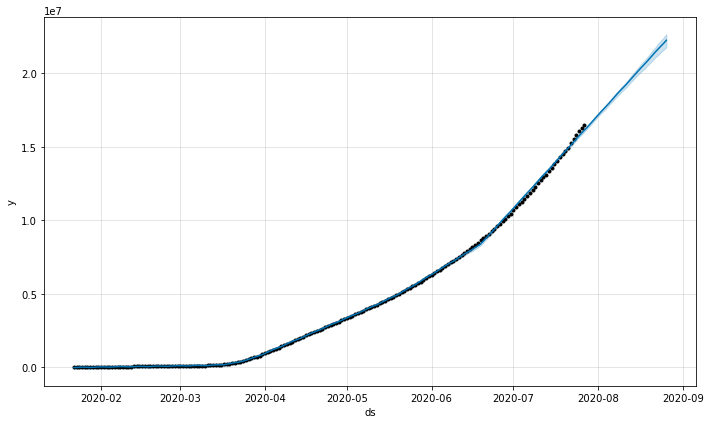

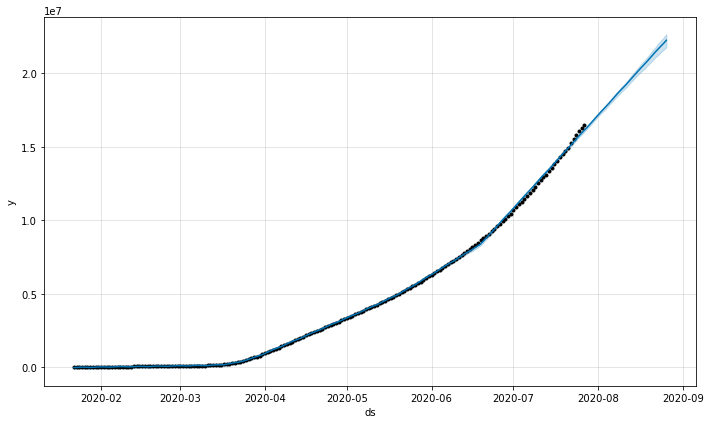

In [27]:
model.plot(predictions)

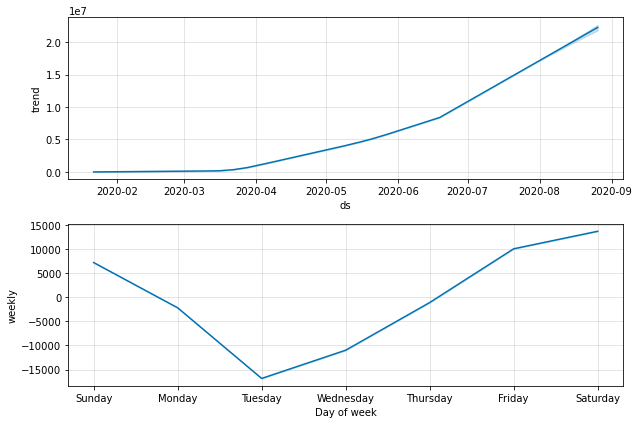

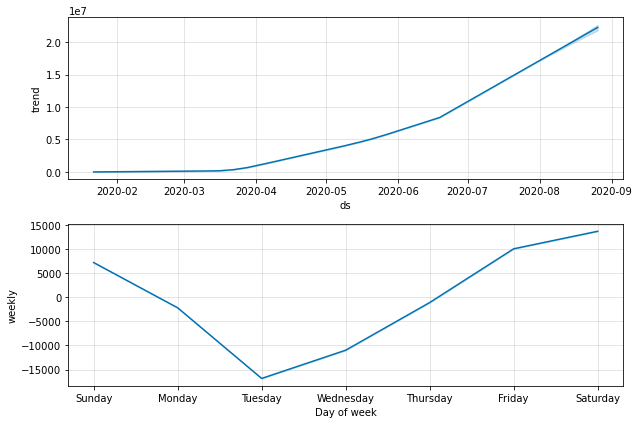

In [28]:
model.plot_components(predictions)

#### Trend Change Points

In [29]:
from fbprophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x1b8266081f0>],

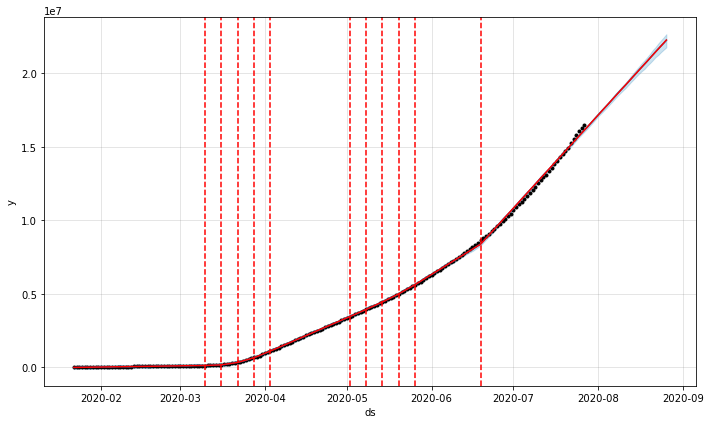

In [30]:
fig = model.plot(predictions)
add_changepoints_to_plot(fig.gca(), model, predictions)

#### Cross Validating The Predictions

In [31]:
from fbprophet.diagnostics import cross_validation

In [32]:
cv = cross_validation(model, horizon = "30 days", period = "30 days", initial = "90 days" )

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196139e+06,3.205955e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279811e+06,3.291853e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361779e+06,3.378606e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439583e+06,3.463735e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.515339e+06,3.549644e+06,3515244,2020-04-28


In [34]:
cv.shape

(90, 6)

#### Obtain Performance Matrix

In [35]:
from fbprophet.diagnostics import performance_metrics

In [36]:
performance = performance_metrics(cv)

In [37]:
performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,3.608663e+10,189964.802922,148235.767249,0.018394,0.022953,0.000000
1,4 days,5.035347e+10,224395.786218,173897.427284,0.020999,0.025662,0.000000
2,5 days,6.982760e+10,264249.130185,202265.950207,0.023663,0.026660,0.000000
3,6 days,9.450776e+10,307421.150624,234494.421828,0.026730,0.031220,0.111111
4,7 days,1.208269e+11,347601.680717,266004.957941,0.029753,0.034872,0.222222


***Root Mean Square Error (RMSE)*** is the square root of the average of the squared differences between the estimated and the actual value of the variable/feature

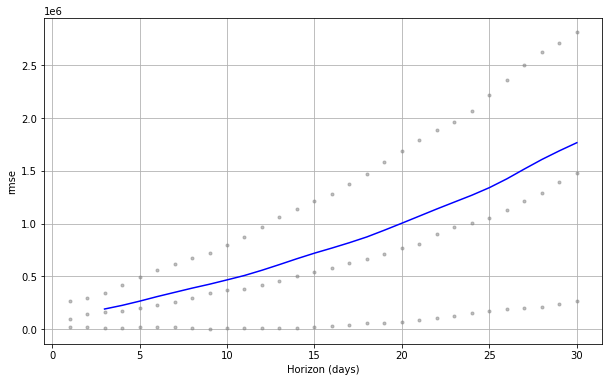

In [38]:
from fbprophet.plot import plot_cross_validation_metric
performance = plot_cross_validation_metric(cv, metric = "rmse")

The ***Mean Squared Error (MSE)*** of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

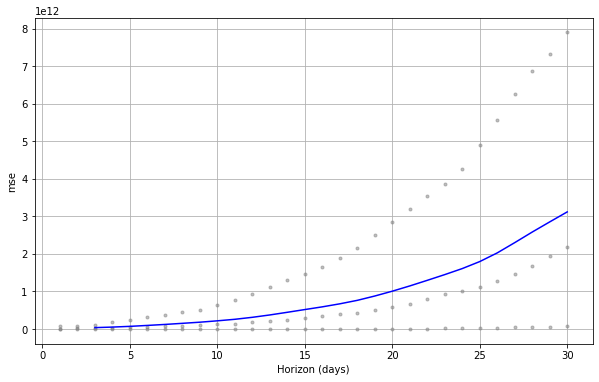

In [39]:
performance = plot_cross_validation_metric(cv, metric = "mse")